In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [5]:
df.duplicated().sum()

25

In [6]:
## need to drop duplicated values

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

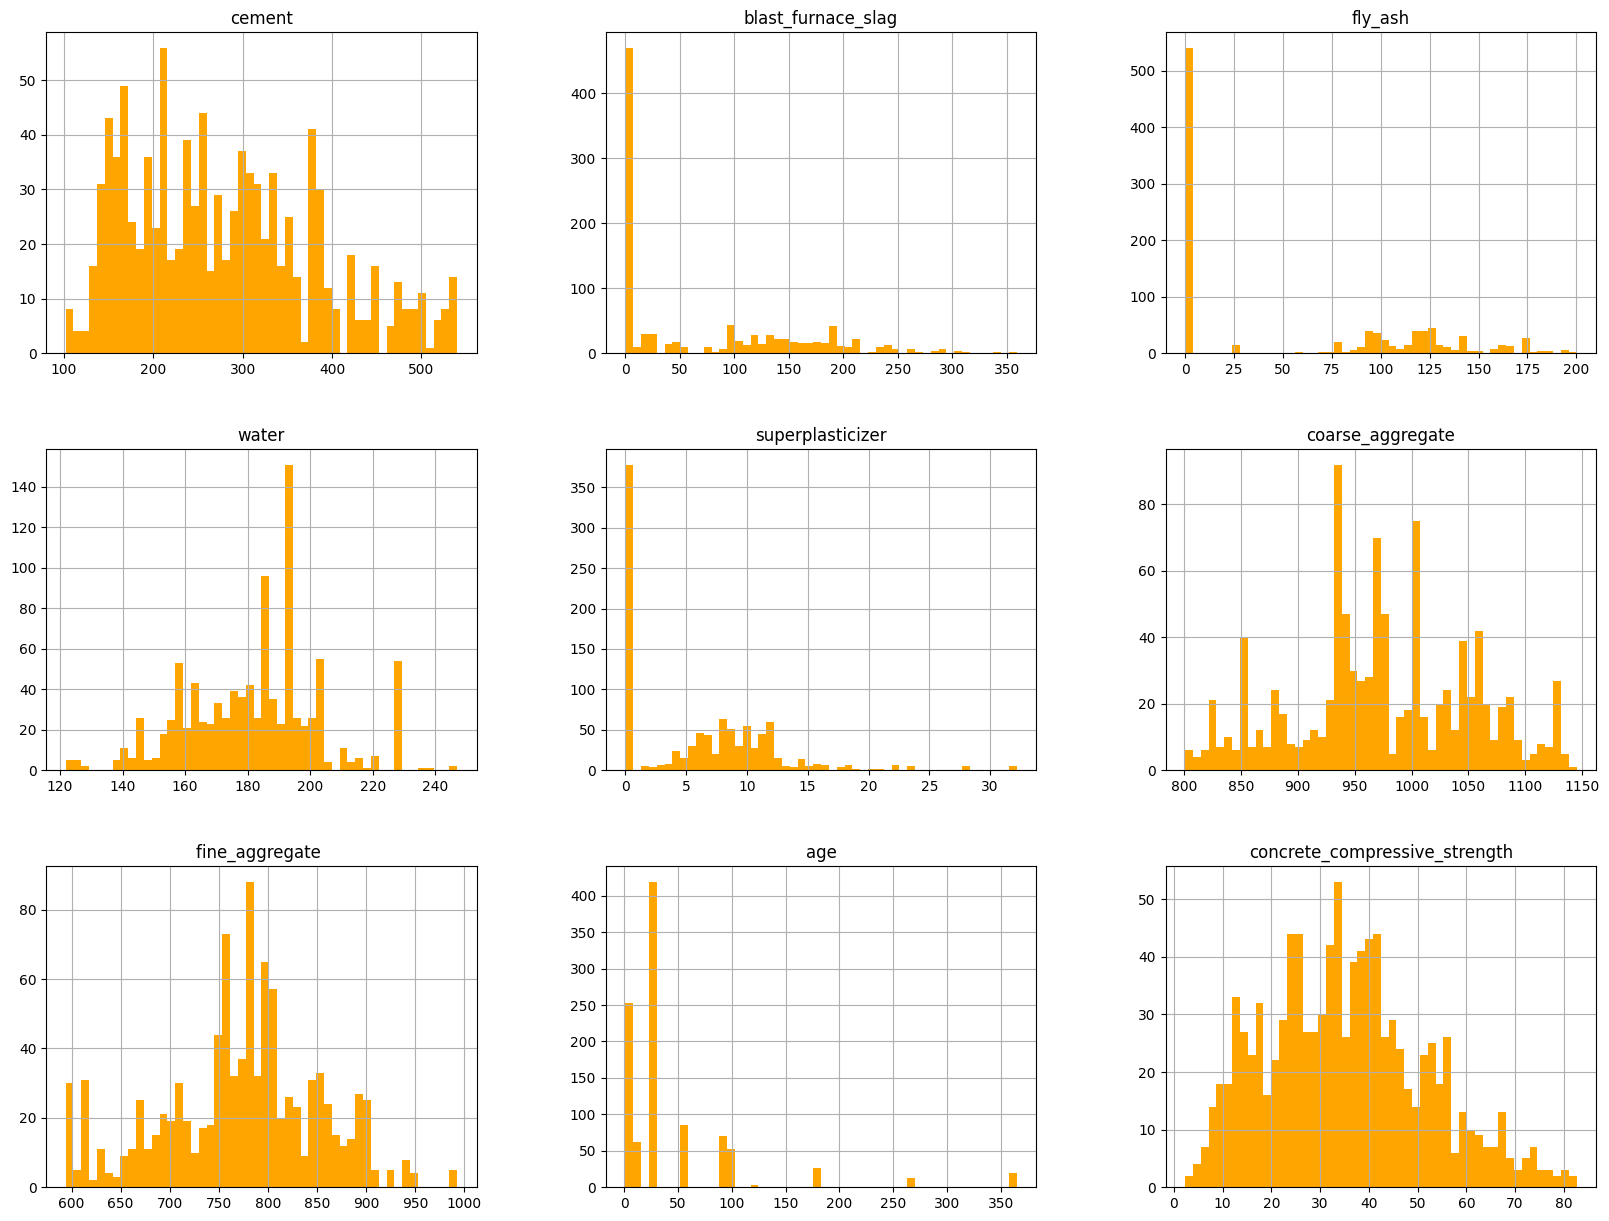

In [10]:

df.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

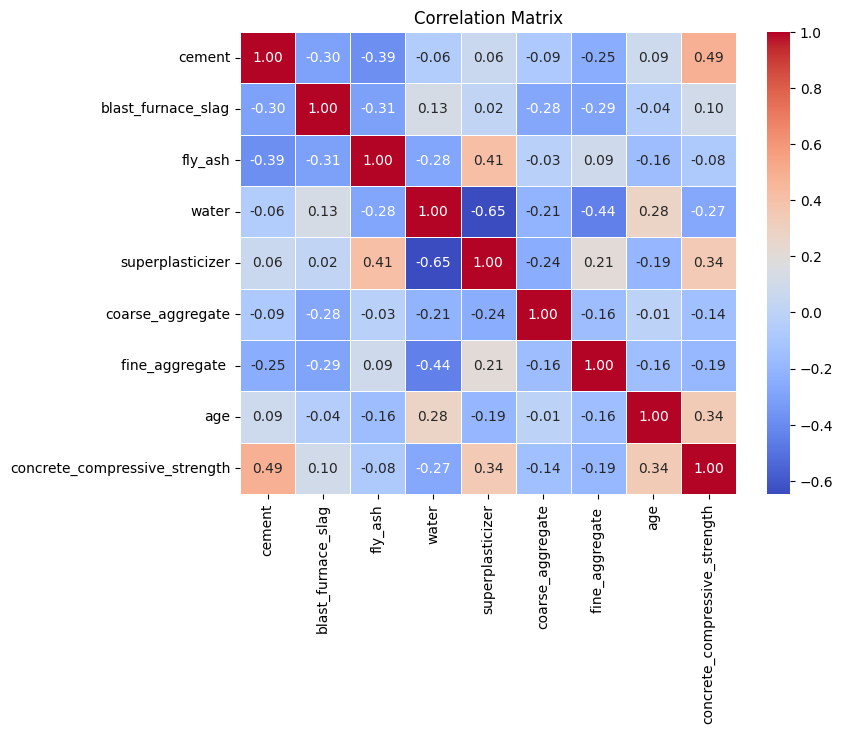

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [13]:
X=df.iloc[:,:-1]
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [14]:
y=df.iloc[:,-1]

In [15]:
st = StandardScaler()
X_transform = st.fit_transform(X)
X_data = pd.DataFrame(X_transform, columns = X.columns)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_data,y,test_size=0.25,random_state=1234)

In [17]:
def model_building(X_train,X_test,y_train,y_test):
    model_lin = LinearRegression()
    model_knn = KNeighborsRegressor(n_neighbors=3)
    model_ds = DecisionTreeRegressor()
    model_rf = RandomForestRegressor()

    print("Model Training Started")
    model_lin_train = model_lin.fit(X_train,y_train)
    model_knn_train = model_knn.fit(X_train,y_train)
    model_ds_train = model_ds.fit(X_train,y_train)
    model_rf_train = model_rf.fit(X_train,y_train)

    print("Model Predicted Started")
    model_lin_predict = model_lin_train.predict(X_test)
    model_knn_predict = model_knn_train.predict(X_test)
    model_ds_predict = model_ds_train.predict(X_test)
    model_rf_predict = model_rf_train.predict(X_test)

    print("R2score")
    r2_lin = r2_score(y_test,model_lin_predict)*100
    print("The accuracy of Linear Regression is - ", round(r2_lin,2))
    r2_knn = r2_score(y_test,model_knn_predict)*100
    print("The accuracy of KNN is - ", round(r2_knn,2))
    r2_ds = r2_score(y_test,model_ds_predict)*100
    print("The accuracy of Decision Tree is - ", round(r2_ds,2))
    r2_rf = r2_score(y_test,model_rf_predict)*100
    print("The accuracy of Random Forest is - ", round(r2_rf,2))
    return r2_lin,r2_knn,r2_ds,r2_rf

In [18]:
r2_lin,r2_knn,r2_ds,r2_rf = model_building(X_train,X_test,y_train,y_test)

Model Training Started
Model Predicted Started
R2score
The accuracy of Linear Regression is -  58.29
The accuracy of KNN is -  63.3
The accuracy of Decision Tree is -  84.58
The accuracy of Random Forest is -  89.35


In [19]:
from sklearn.model_selection import GridSearchCV

rf_regressor = RandomForestRegressor()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predict on the test set with the best model
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
r2_sco= r2_score(y_test, y_pred)
print("The accuracy of hypertuned model is:", r2_sco)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [21]:
RF = RandomForestRegressor(max_depth=15, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100, random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', random_state=42)

In [22]:
rf_predict = RF.predict(X_test)

In [23]:
r2_rf2 = r2_score(y_test,rf_predict)*100

In [24]:
r2_rf2

86.67968805830134

In [ ]:
### Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}